In [64]:
#This is a Time Series Problem where we Forecast sales by using Arima and Sarimax Model based on 
#various parameters like seasonality etc.

#Import all Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
import os

In [65]:
#Change Directiry to source directory
os.chdir("C:\\Users\\sowmy\\Downloads")

In [66]:
#Read file from Directory
Sales=pd.read_csv("train.csv")

In [67]:
Sales

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
...,...,...,...,...
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899


In [68]:
#Change dsts Type of Date as DateTime

In [69]:
Sales['Date']=pd.to_datetime(Sales['Date'])

In [70]:
#Set Date as index
Sales=Sales.set_index('Date')

In [71]:
Sales

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,6,9,890
2018-12-28,6,9,892
2018-12-29,6,9,895


In [72]:
#Lets resample Date to Month.We ll forcast for Monthly Basis

In [73]:
Sales=Sales.resample('m').mean()

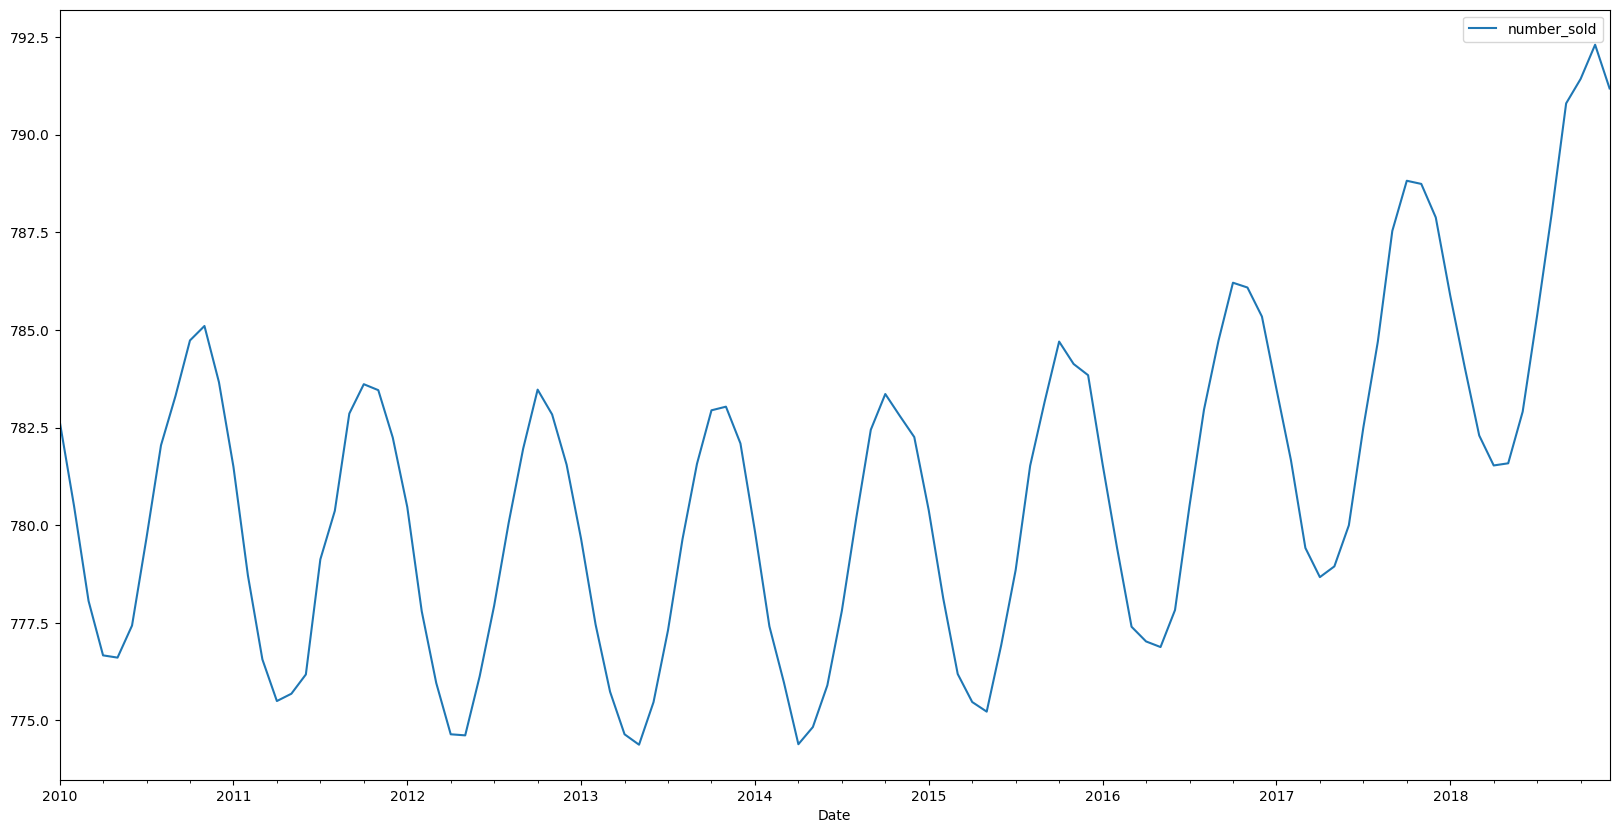

In [74]:
Sales.plot(y='number_sold')
plt.show()

In [ ]:
#Plot Rolling Average

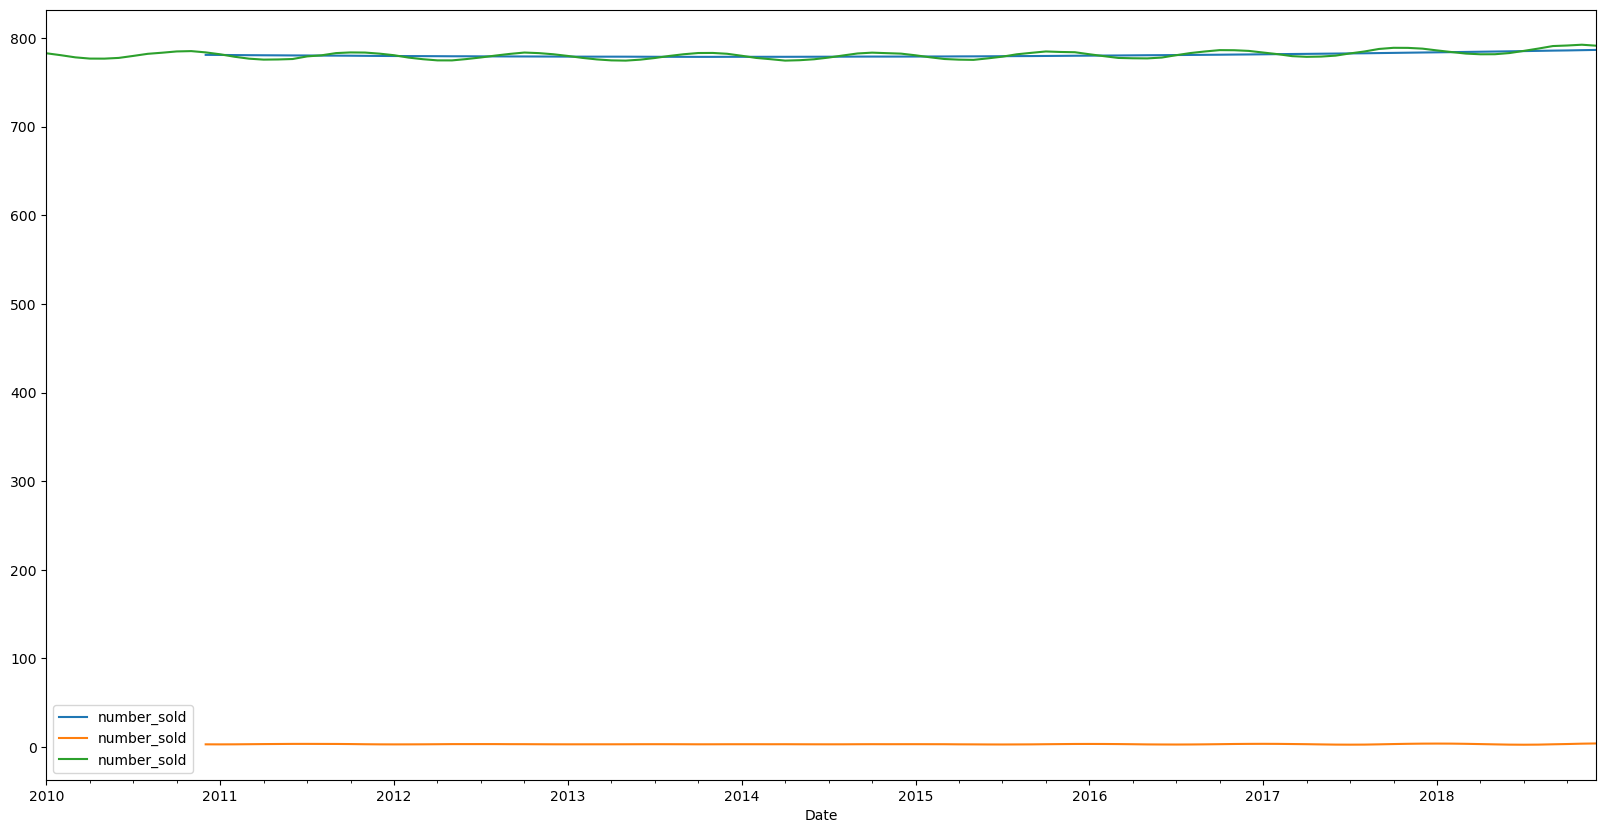

In [78]:
Sales['number_sold'].rolling(12).mean().plot()
Sales['number_sold'].rolling(12).std().plot()
Sales['number_sold'].plot()
plt.legend()
plt.show()

In [79]:
#Using Seasonal Decompose caluclate Trend and seasonality

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

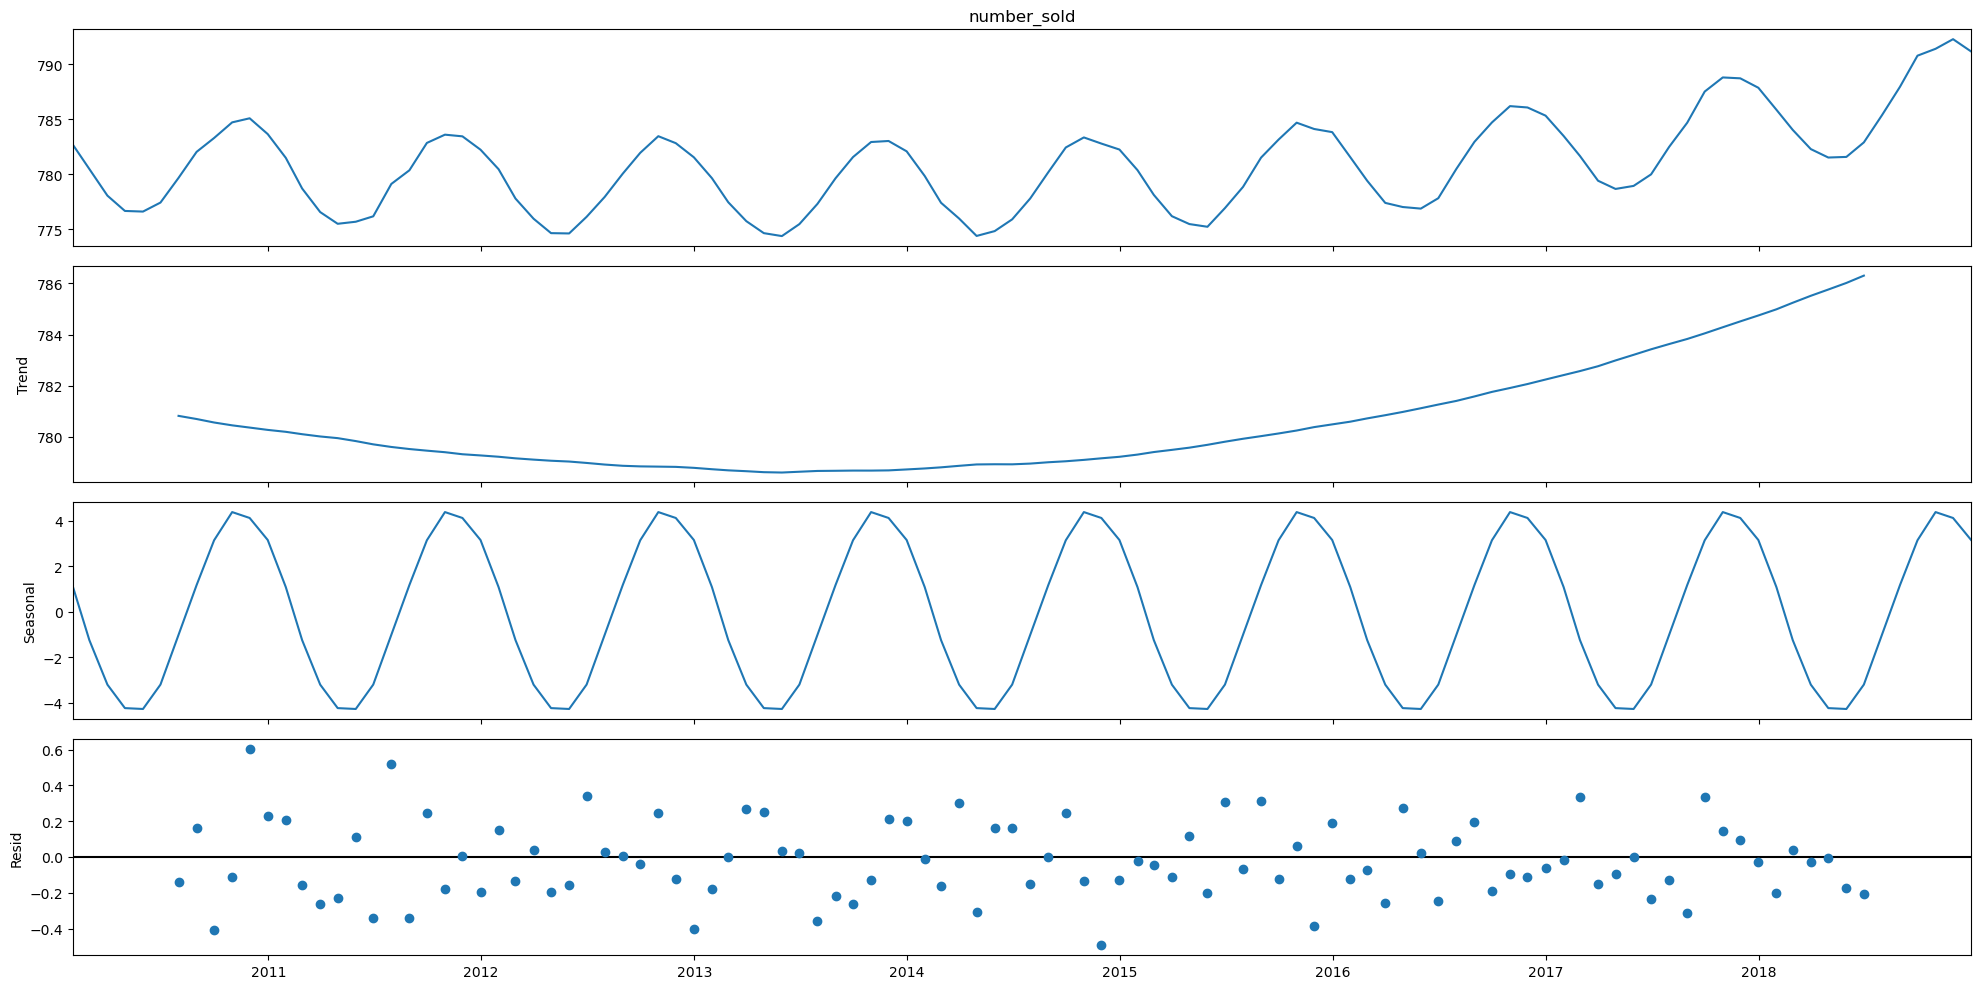

In [81]:
seasonal_decompose(Sales['number_sold'],period=12).plot()
plt.show()


In [82]:
#Carryout Adfuller Test to check if series is stationery

In [83]:
from statsmodels.tsa.stattools import adfuller

In [87]:
x=adfuller(Sales['number_sold'])

In [88]:
def Test(a):
    print("Total Lags",a[2])
    print("Total Observations",a[3])
    if(a[1]<.05):
      print("Time Series is Stationery")
    else:
      print("Time Series Not Stationery")

In [90]:
Test(x)

Total Lags 13
Total Observations 94
Time Series Not Stationery


In [ ]:
#Carry out first difference to make series Stationery.If Still unable to get a stationery series do second

In [92]:
Sales['First_Difference']=Sales['number_sold']-Sales['number_sold'].shift(1)

In [93]:
Sales

,store,product,number_sold,First_Difference
Date,,,,
2010-01-31,3.0,4.5,782.674194,NaN
2010-02-28,3.0,4.5,780.484694,-2.189500
2010-03-31,3.0,4.5,778.058986,-2.425708
2010-04-30,3.0,4.5,776.665714,-1.393272
2010-05-31,3.0,4.5,776.608295,-0.057419
...,...,...,...,...
2018-08-31,3.0,4.5,787.972811,2.595853
2018-09-30,3.0,4.5,790.802381,2.829570
2018-10-31,3.0,4.5,791.428571,0.626190


In [21]:
x1

(-0.1833430118921063,
 0.9404781800020897,
 13,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 59.10184107768151)

In [94]:
Test(x1)

Total Lags 13
Total Observations 93
Time Series Not Stationery


In [22]:
Sales['Second_Difference']=Sales['First_Difference']-Sales['First_Difference'].shift(1)

In [23]:
x2=adfuller(Sales['Second_Difference'].dropna())

In [24]:
Test(x2)

Total Lags 13
Total Observations 92
Time Series is Stationery


In [25]:
from pmdarima import auto_arima
auto_arima(Sales['number_sold'],m=12,D=2)

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(2, 2, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [95]:
#Generate Training and Testing Data set

In [96]:
Train=Sales.iloc[:100,2]

In [97]:
Test=Sales.iloc[100:,2]

In [ ]:
#Apply Sarimax Model as seasonality is present

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [99]:
Model=SARIMAX(Train,order=(1,0,1),seasonal_order=(2,2,0,12))

In [100]:
predictor=Model.fit()

In [32]:
predicted=predictor.predict(start=len(Train),end=len(Train)+len(Test)-1,typ='levels')

C:\ProgramData\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
#Calculate Accuracy of Model

In [105]:
from sklearn.metrics import r2_score


In [106]:
r2_score(predicted,Test)

0.9940453850055205

In [ ]:
#plot Test Data and Predicted

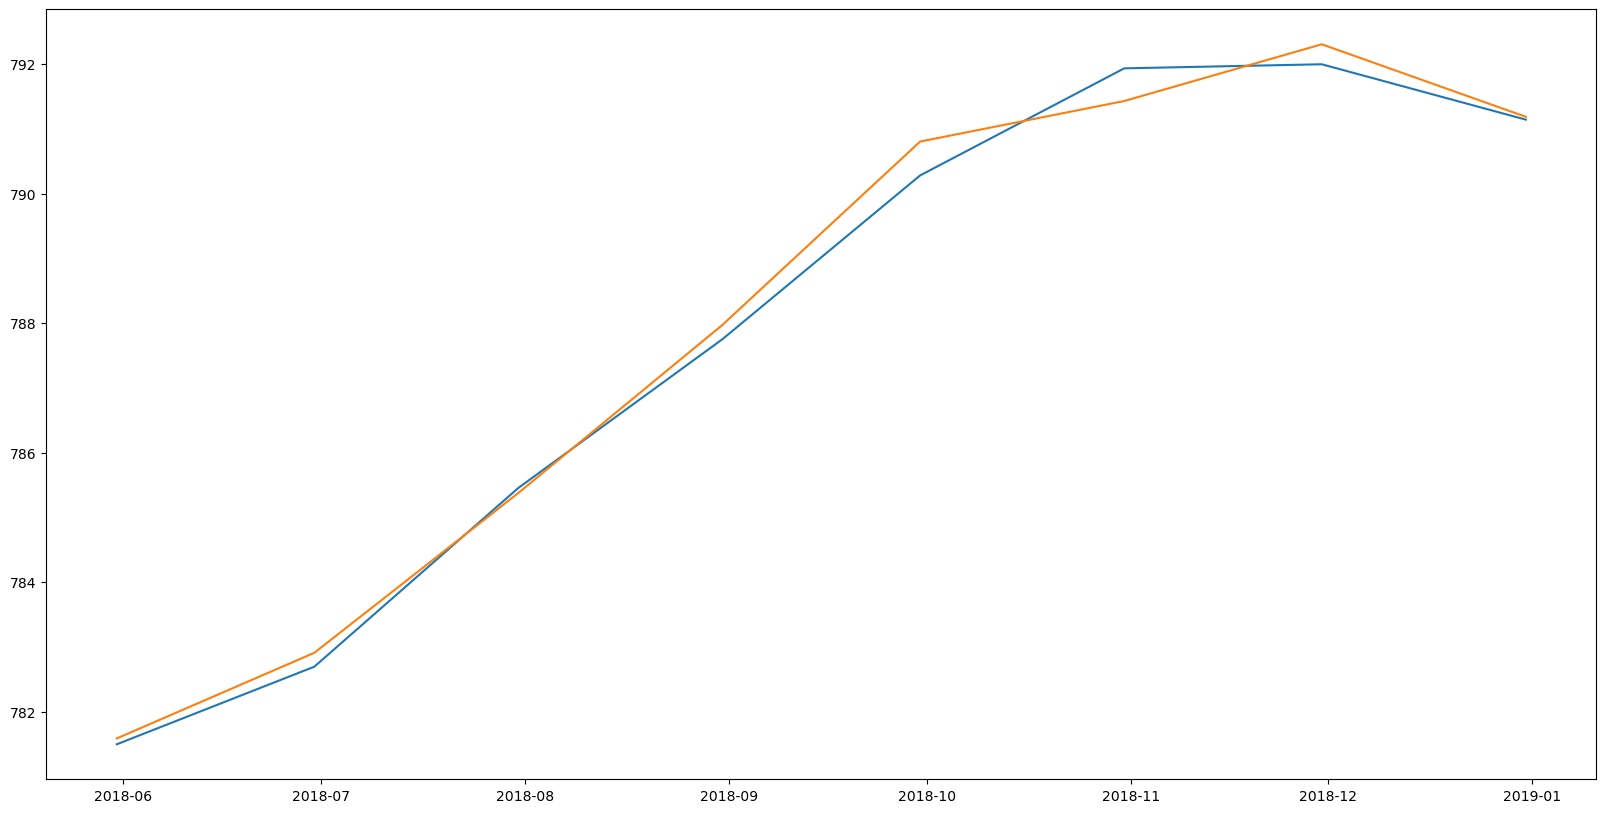

In [35]:
plt.plot(predicted)
plt.plot(Test)
plt.show()

In [107]:
#Calculate Prediction for all values in Data set

In [108]:
predicted_Final=predictor.predict(start=0,end=108,typ='levels')

C:\ProgramData\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
#Plot predicted Final and Actual Dataset

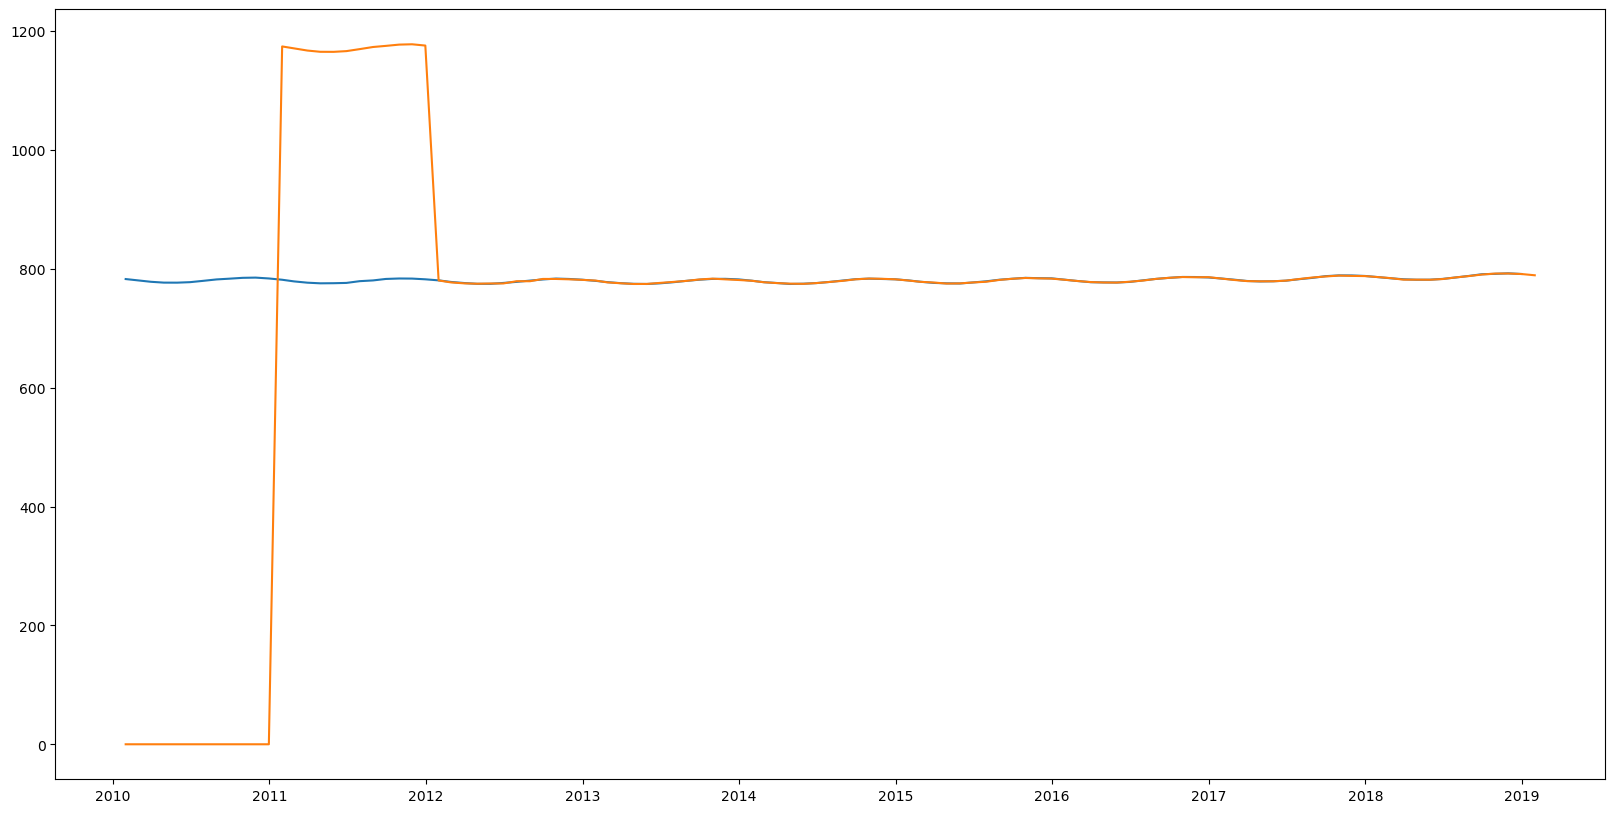

In [37]:
plt.plot(Sales['number_sold'])
plt.plot(predicted_Final)
plt.show()

In [109]:
#Predict for next 24 Months(Monthly Forecast for next  2 Years)

In [110]:
predicted_Future=predictor.predict(start=108,end=132,typ='levels')

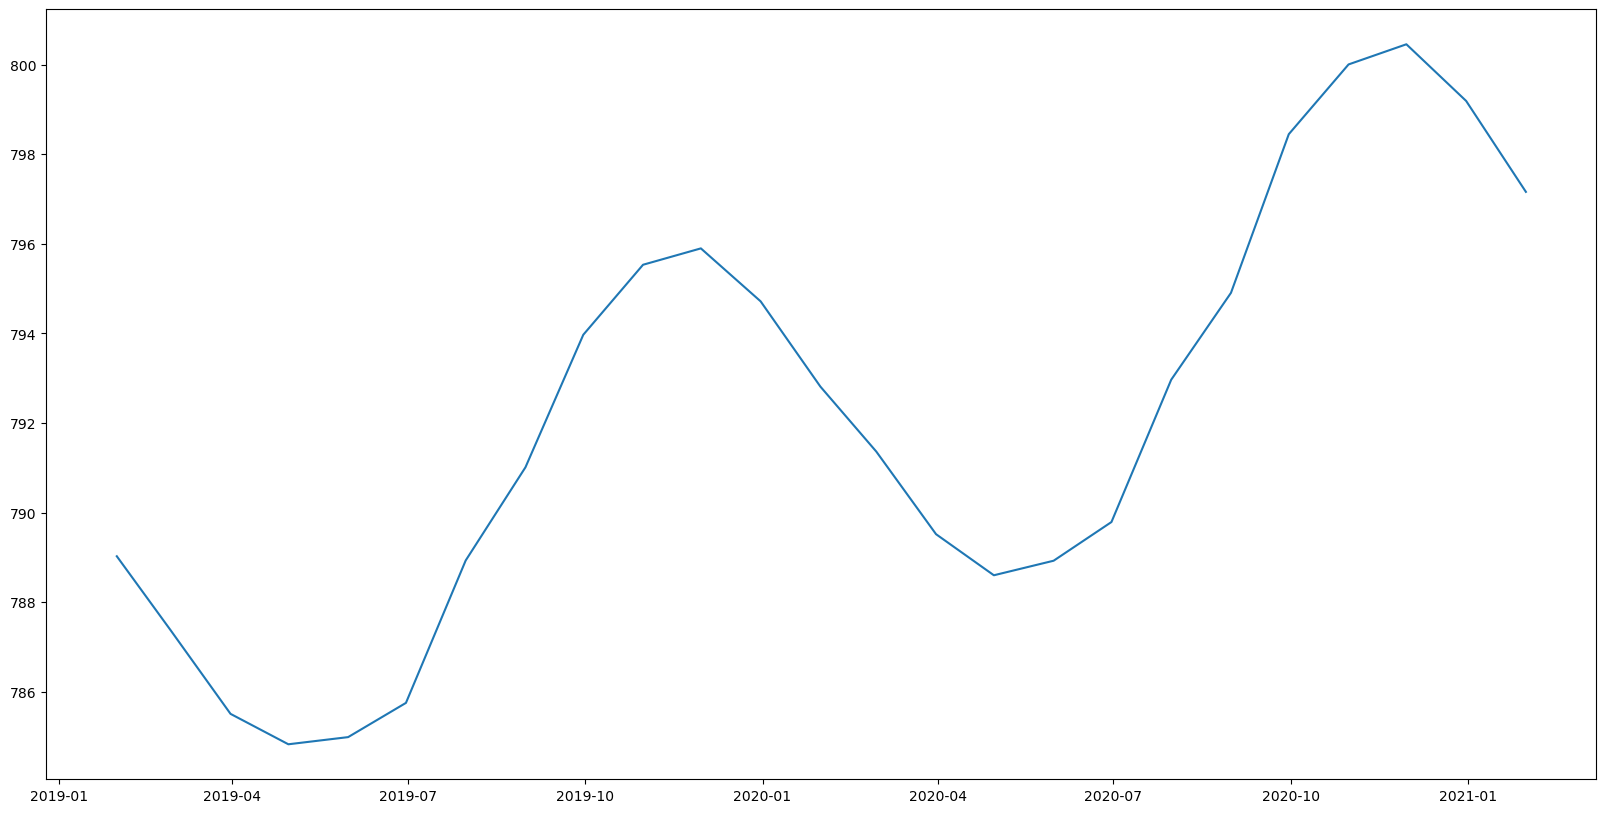

In [111]:
plt.plot(predicted_Future)
plt.show()

In [ ]:
#Plot Training,Test,Forecast Data in a single Pot

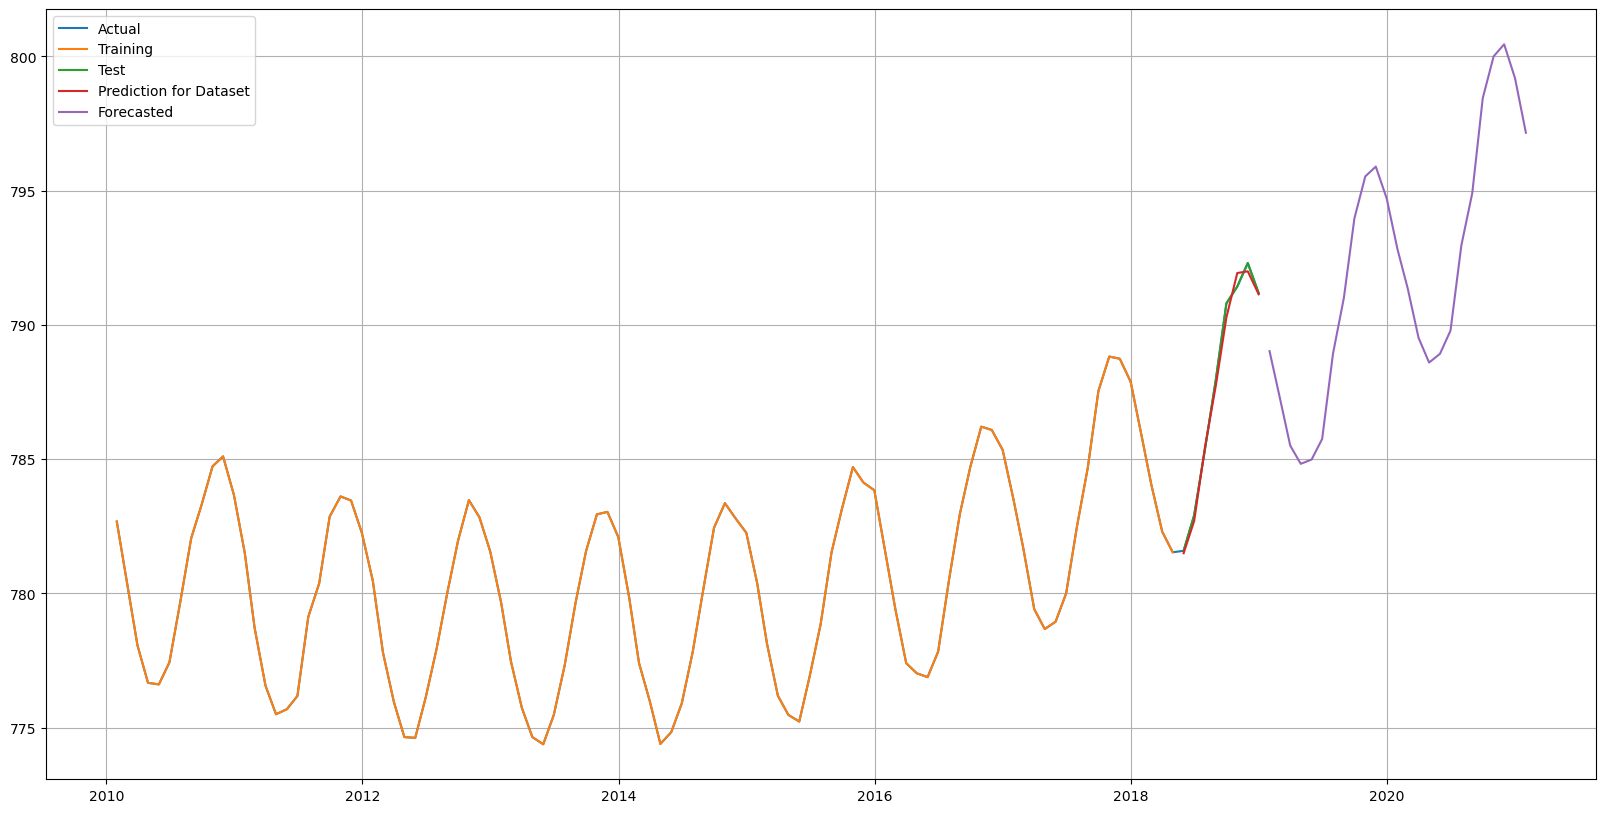

In [40]:
plt.plot(Sales['number_sold'],label='Actual')
plt.plot(Train,label='Training')
plt.plot(Test,label='Test')
plt.plot(predicted,label='Prediction for Dataset')
plt.plot(predicted_Future,label='Forecasted')
plt.legend()
plt.grid()
plt.show()

In [41]:
predicted_Future=pd.DataFrame(predicted_Future)

In [42]:
Forecast=pd.DataFrame(predicted_Future)

In [43]:
Forecast=Forecast.rename(columns={'predicted_mean':'Forecasted Sales Value'})

In [44]:
Forecast

,Forecasted Sales Value
2019-01-31,789.023374
2019-02-28,787.366863
2019-03-31,785.504493
2019-04-30,784.825337
2019-05-31,784.985209
2019-06-30,785.749369
2019-07-31,788.929645
2019-08-31,791.009749
2019-09-30,793.968683
2019-10-31,795.531846


In [112]:
Forecast.to_excel("Monthly Sales Forecast.xlsx")